<a href="https://colab.research.google.com/github/moon2su/ML-programming/blob/main/WISDM_1D_CNN_0919(Robust).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Bidirectional, LSTM, Dropout, Dense
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from pandas.plotting import register_matplotlib_converters

In [ ]:
names = ["user_id", "activity", "timestamp", "x_axis", "y_axis", "z_axis", "NaN"]

data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/WISDM_ar_v1.1/WISDM_ar_v1.1_raw.txt", header=None, names=names, comment=";")
data

,user_id,activity,timestamp,x_axis,y_axis,z_axis,NaN
0,33,Jogging,49105962326000,-0.694638,12.680544,0.503953,NaN
1,33,Jogging,49106062271000,5.012288,11.264028,0.953424,NaN
2,33,Jogging,49106112167000,4.903325,10.882658,-0.081722,NaN
3,33,Jogging,49106222305000,-0.612916,18.496431,3.023717,NaN
4,33,Jogging,49106332290000,-1.184970,12.108489,7.205164,NaN
...,...,...,...,...,...,...,...
1098199,19,Sitting,131623331483000,9.000000,-1.570000,1.690000,NaN
1098200,19,Sitting,131623371431000,9.040000,-1.460000,1.730000,NaN
1098201,19,Sitting,131623411592000,9.080000,-1.380000,1.690000,NaN
1098202,19,Sitting,131623491487000,9.000000,-1.460000,1.730000,NaN


In [ ]:
def convert_to_float(x):
    try:
        return np.float64(x)
    except:
        return np.nan

df = data.drop('NaN', axis=1, errors='ignore')
df["z_axis"].replace(regex = True, inplace = True, to_replace = r';', value = r'')

df["z_axis"] = df["z_axis"].apply(convert_to_float)
df.dropna(axis=0, how='any', inplace=True)
df.head()

/tmp/ipython-input-4184991128.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["z_axis"].replace(regex = True, inplace = True, to_replace = r';', value = r'')


,user_id,activity,timestamp,x_axis,y_axis,z_axis
0,33,Jogging,49105962326000,-0.694638,12.680544,0.503953
1,33,Jogging,49106062271000,5.012288,11.264028,0.953424
2,33,Jogging,49106112167000,4.903325,10.882658,-0.081722
3,33,Jogging,49106222305000,-0.612916,18.496431,3.023717
4,33,Jogging,49106332290000,-1.184970,12.108489,7.205164


<Axes: xlabel='activity', ylabel='count'>

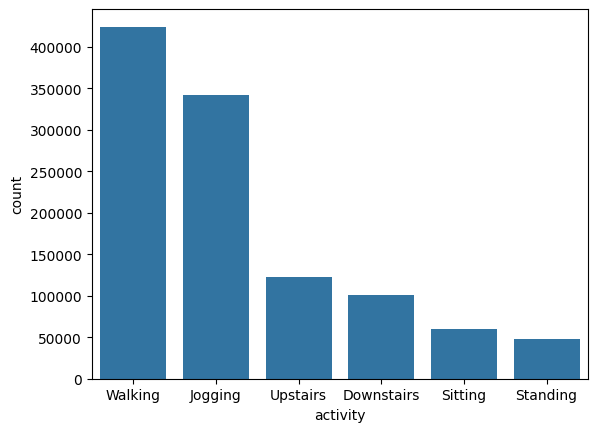

In [ ]:
sns.countplot(x = "activity", data = df, order = df.activity.value_counts().index)

In [ ]:
df['activity'].value_counts()

,count
activity,
Walking,424397
Jogging,342176
Upstairs,122869
Downstairs,100427
Sitting,59939
Standing,48395


/tmp/ipython-input-3870980742.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = "user_id", data = df, palette = [sns.color_palette()[0]],
/tmp/ipython-input-3870980742.py:1: UserWarning: 
The palette list has fewer values (1) than needed (36) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(x = "user_id", data = df, palette = [sns.color_palette()[0]],


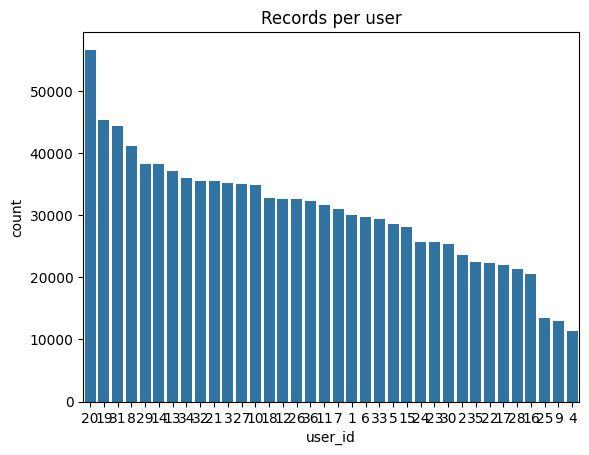

In [ ]:
sns.countplot(x = "user_id", data = df, palette = [sns.color_palette()[0]],
              order = df.user_id.value_counts().index)
plt.title("Records per user");

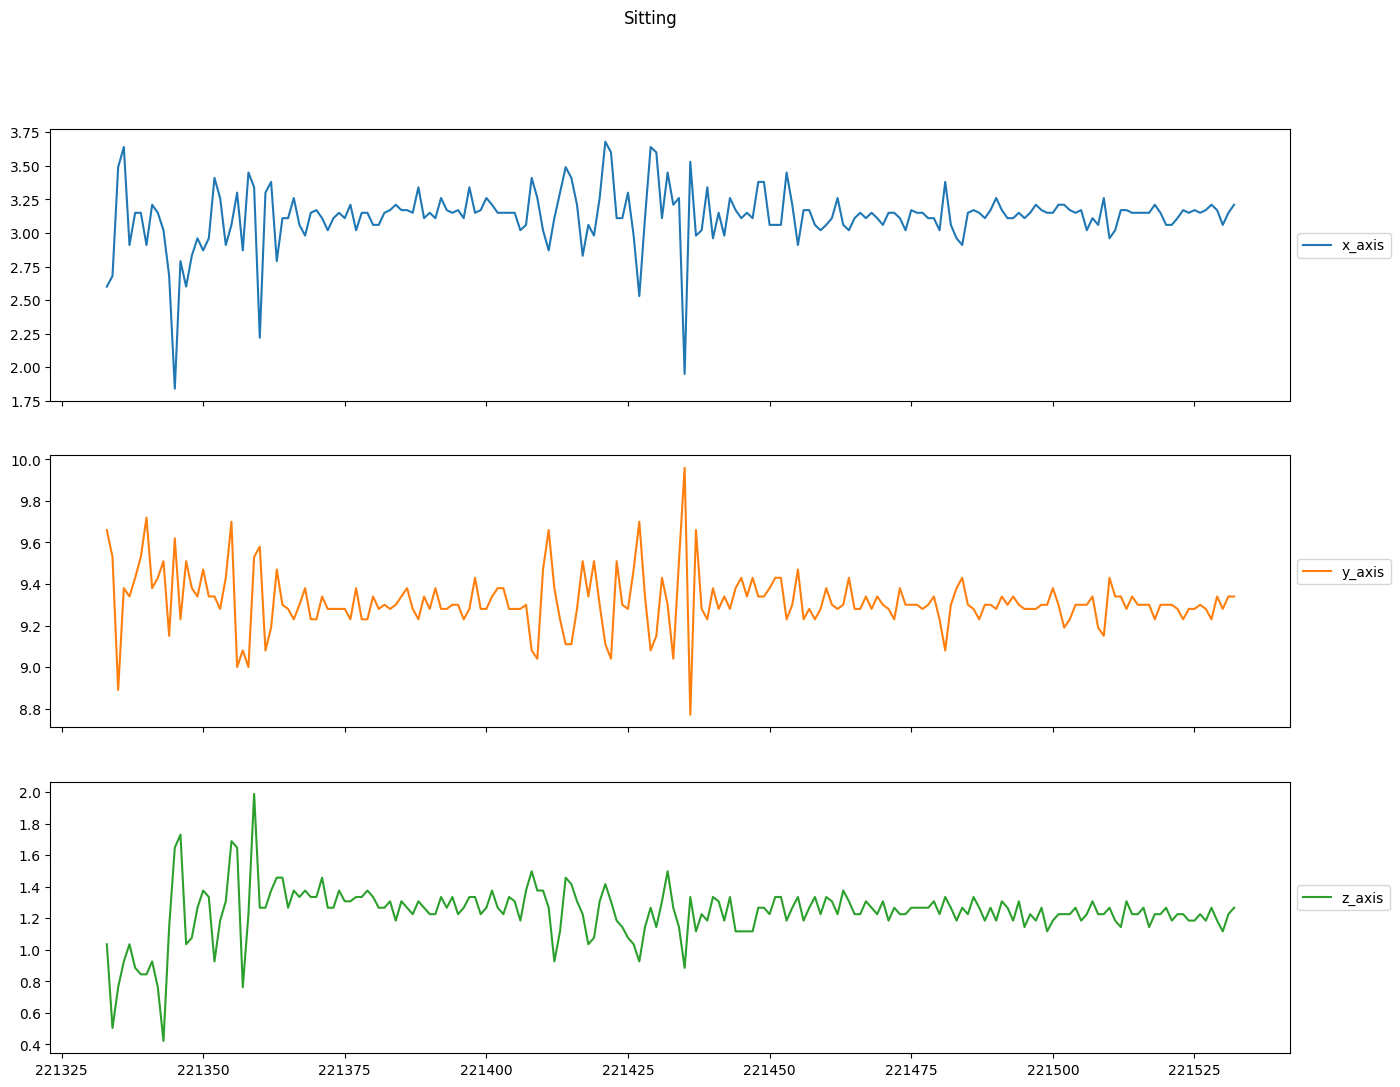

In [ ]:
def plot_activity(activity, df):
  data = df[df["activity"] == activity][["x_axis", "y_axis", "z_axis"]][:200]
  axis = data.plot(subplots = True, figsize = (16, 12), title = activity)
  for ax in axis:
    ax.legend(loc = "lower left", bbox_to_anchor = (1.0, 0.5))

plot_activity("Sitting", df)

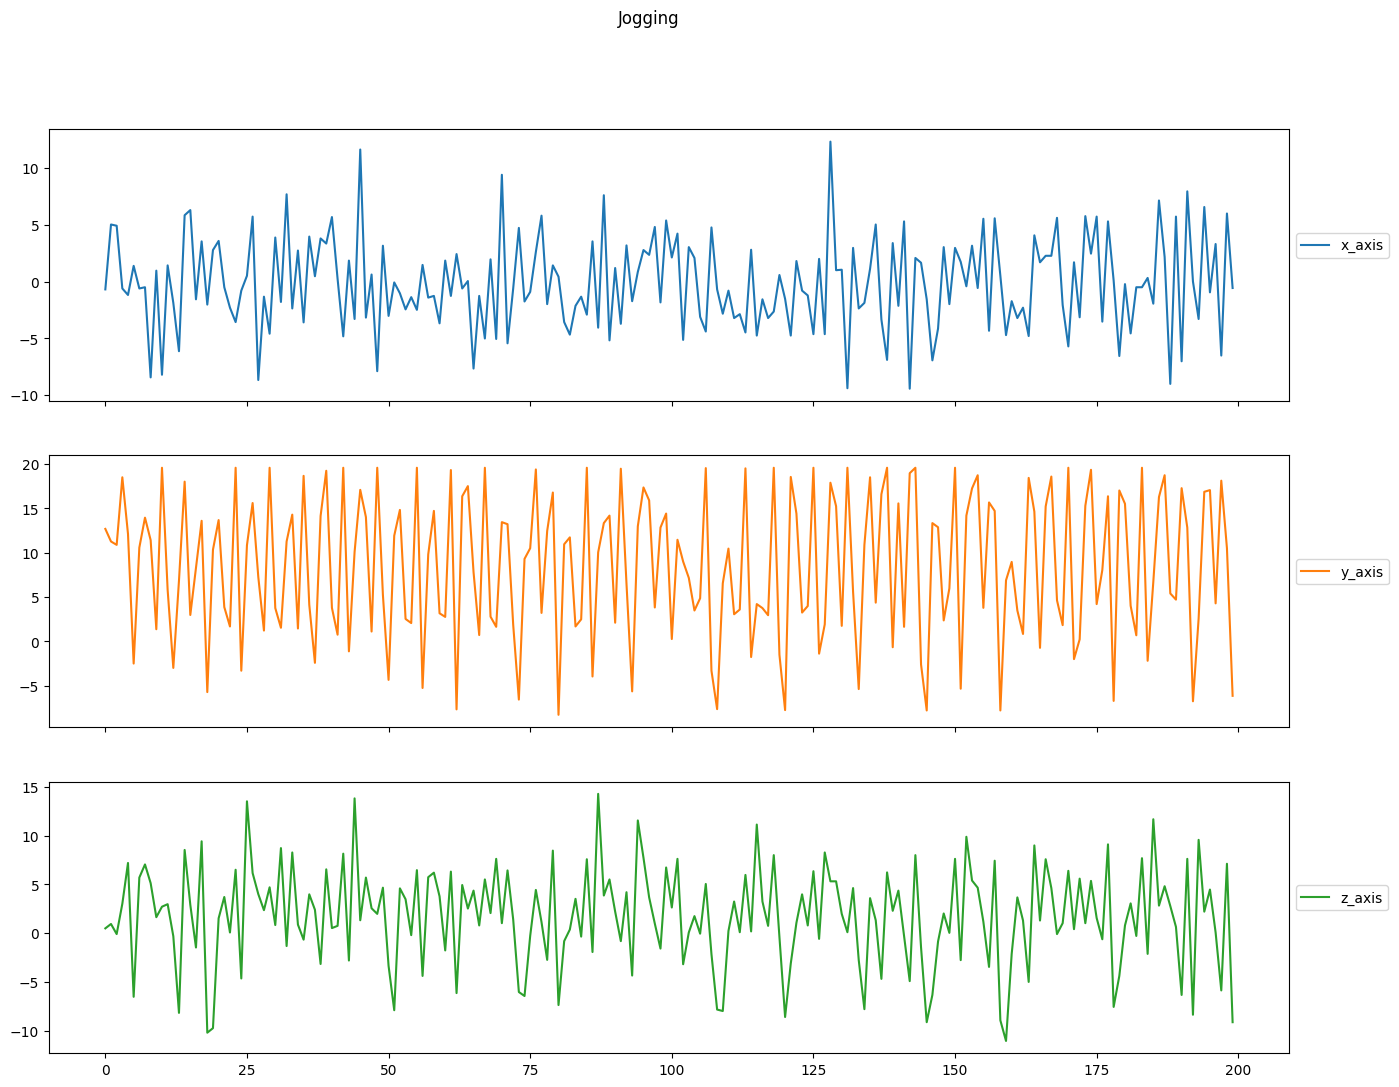

In [ ]:
plot_activity("Jogging", df)

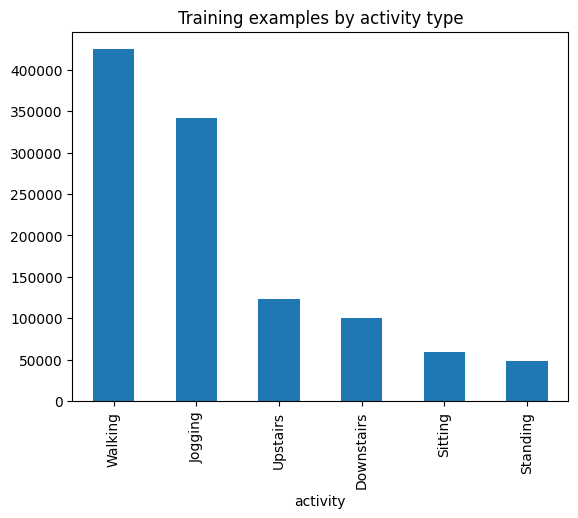

In [ ]:
df['activity'].value_counts().plot(kind='bar', title="Training examples by activity type");

In [ ]:
df_train = df[df["user_id"] <= 30]
df_test = df[df["user_id"] > 30]

In [ ]:
df_train

,user_id,activity,timestamp,x_axis,y_axis,z_axis
8489,17,Walking,57869902574000,0.572055,9.806650,-0.531194
8490,17,Walking,57870012316000,-0.000000,10.188020,-0.572055
8491,17,Walking,57870122301000,-0.231546,9.847511,-0.694638
8492,17,Walking,57870222246000,0.149824,10.079058,-0.503953
8493,17,Walking,57870332292000,0.149824,10.147159,-0.612916
...,...,...,...,...,...,...
1098199,19,Sitting,131623331483000,9.000000,-1.570000,1.690000
1098200,19,Sitting,131623371431000,9.040000,-1.460000,1.730000
1098201,19,Sitting,131623411592000,9.080000,-1.380000,1.690000
1098202,19,Sitting,131623491487000,9.000000,-1.460000,1.730000


In [ ]:
df_train['activity'].value_counts()

,count
activity,
Walking,353508
Jogging,275439
Upstairs,102810
Downstairs,82634
Sitting,45810
Standing,38159


In [ ]:
df_test['activity'].value_counts()

,count
activity,
Walking,70889
Jogging,66737
Upstairs,20059
Downstairs,17793
Sitting,14129
Standing,10236


#Balance Adjustment
(왜 sitting이랑 standing만 균형 조절 하는지 모르겠음)

In [ ]:
Sitting = df_train[df_train['activity']=='Sitting'].head(38159).copy()
Standing  = df_train[df_train['activity']=='Standing'].head(38159).copy()

In [ ]:
TSitting = df_test[df_test['activity']=='Sitting'].head(10236).copy()
TStanding  = df_test[df_test['activity']=='Standing'].head(10236).copy()

In [ ]:
new_df_train = pd.DataFrame()
new_df_train = pd.concat([new_df_train, Sitting, Standing])
new_df_train.shape

(76318, 6)

In [ ]:
new_df_test = pd.DataFrame()
new_df_test = pd.concat([new_df_test, TSitting, TStanding])
new_df_test.shape

(20472, 6)

In [ ]:
new_df_train['activity'].value_counts()


,count
activity,
Sitting,38159
Standing,38159


In [ ]:
new_df_test['activity'].value_counts()


,count
activity,
Sitting,10236
Standing,10236


In [ ]:
from sklearn.preprocessing import RobustScaler

scale_columns = ["x_axis", "y_axis", "z_axis"]

scaler = RobustScaler()

scaler = scaler.fit(df_train[scale_columns])

new_df_train.loc[:, scale_columns] = scaler.transform(new_df_train[scale_columns].to_numpy())
new_df_test.loc[:, scale_columns] = scaler.transform(new_df_test[scale_columns].to_numpy())

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RobustScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RobustScaler was fitted with feature names
  warnings.warn(


In [ ]:
import numpy as np

def create_dataset(X, y, time_steps=1, step=1):
  Xs, ys = [], []
  for i in range(0, len(X) - time_steps, step):
    v = X.iloc[i:(i + time_steps)].to_numpy()
    labels = y.iloc[i: i + time_steps]
    vals, counts = np.unique(labels, return_counts=True)
    ys.append(vals[np.argmax(counts)])
    Xs.append(v)
  return np.array(Xs), np.array(ys).reshape(-1, 1)

TIME_STEPS = 200
STEP = 40

X_train, y_train = create_dataset(df_train[["x_axis", "y_axis", "z_axis"]], df_train.activity, TIME_STEPS, STEP)
X_test, y_test = create_dataset(df_test[["x_axis", "y_axis", "z_axis"]], df_test.activity, TIME_STEPS, STEP)

print(X_train.shape, y_train.shape)

(22454, 200, 3) (22454, 1)


In [ ]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown = "ignore", sparse_output = False)
enc = enc.fit(y_train)

y_train = enc.transform(y_train)
y_test = enc.transform(y_test)

print(X_train.shape, y_train.shape)

(22454, 200, 3) (22454, 6)


In [ ]:
verbose,epochs,batch_size=1,10,32

n_timesteps, n_features,n_outputs=X_train.shape[1],X_train.shape[2],y_train.shape[1]

In [ ]:
#CNN MODEL

inputs = keras.Input(shape = (n_timesteps, n_features))

conv_1 = tf.keras.layers.Conv1D(filters=64, kernel_size = 5, strides = 2, activation = 'relu')(inputs)
maxpool_1 = tf.keras.layers.MaxPooling1D(pool_size = 2, strides = 2)(conv_1)

conv_2 = tf.keras.layers.Conv1D(filters = 96, kernel_size = 3, strides = 1, activation = 'relu')(maxpool_1)
maxpool_2 = tf.keras.layers.MaxPooling1D(pool_size = 2, strides = 1)(conv_2)

conv_3 = tf.keras.layers.Conv1D(filters = 32, kernel_size = 3, strides = 1, activation = 'relu')(maxpool_2)
avg_pooling = tf.keras.layers.GlobalAveragePooling1D()(conv_3)
batch_norm = tf.keras.layers.BatchNormalization()(avg_pooling)

output = tf.keras.layers.Dense(n_outputs, activation = 'softmax')(batch_norm)
model = tf.keras.Model(inputs = inputs, outputs = output)
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 200, 3)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_3 (Conv1D)               │ (None, 98, 64)         │         1,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_2 (MaxPooling1D)  │ (None, 49, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_4 (Conv1D)               │ (None, 47, 96)         │        18,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_3 (MaxPooling1D)  │ (None, 46, 96)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_5 (Conv1D)               │ (None, 44, 32)         │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d_1      │ (None, 32)             │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │           198 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 29,126 (113.77 KB)

 Trainable params: 29,062 (113.52 KB)

 Non-trainable params: 64 (256.00 B)

In [ ]:
import pydot
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes = True, to_file = 'CNN_Model.png')
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, epochs = epochs, batch_size = batch_size)
model.summary

Epoch 1/10
702/702 ━━━━━━━━━━━━━━━━━━━━ 17s 19ms/step - accuracy: 0.8040 - loss: 0.6101
Epoch 2/10
702/702 ━━━━━━━━━━━━━━━━━━━━ 18s 17ms/step - accuracy: 0.9641 - loss: 0.1193
Epoch 3/10
702/702 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.9784 - loss: 0.0751
Epoch 4/10
702/702 ━━━━━━━━━━━━━━━━━━━━ 12s 17ms/step - accuracy: 0.9824 - loss: 0.0598
Epoch 5/10
702/702 ━━━━━━━━━━━━━━━━━━━━ 12s 17ms/step - accuracy: 0.9847 - loss: 0.0501
Epoch 6/10
702/702 ━━━━━━━━━━━━━━━━━━━━ 20s 16ms/step - accuracy: 0.9866 - loss: 0.0422
Epoch 7/10
702/702 ━━━━━━━━━━━━━━━━━━━━ 21s 17ms/step - accuracy: 0.9879 - loss: 0.0390
Epoch 8/10
702/702 ━━━━━━━━━━━━━━━━━━━━ 20s 16ms/step - accuracy: 0.9875 - loss: 0.0366
Epoch 9/10
702/702 ━━━━━━━━━━━━━━━━━━━━ 21s 17ms/step - accuracy: 0.9894 - loss: 0.0328
Epoch 10/10
702/702 ━━━━━━━━━━━━━━━━━━━━ 24s 22ms/step - accuracy: 0.9916 - loss: 0.0244


<bound method Model.summary of <Functional name=functional, built=True>>

In [ ]:
loss = history.history["loss"]
acc = history.history["accuracy"]

In [ ]:
%time
print(X_test.shape, y_test.shape)
base_loss, base_accuracy = model.evaluate(X_test, y_test, batch_size = batch_size, verbose = 1)

score = base_accuracy * 100
print('Accuracy > {:f}'.format(score))
print('Base Loss > {:.2f}'.format(base_loss))

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 6.91 µs
(4992, 200, 3) (4992, 6)
156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9148 - loss: 0.4739
Accuracy > 93.649840
Base Loss > 0.27


In [ ]:
y_pred = model.predict(X_test)

156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


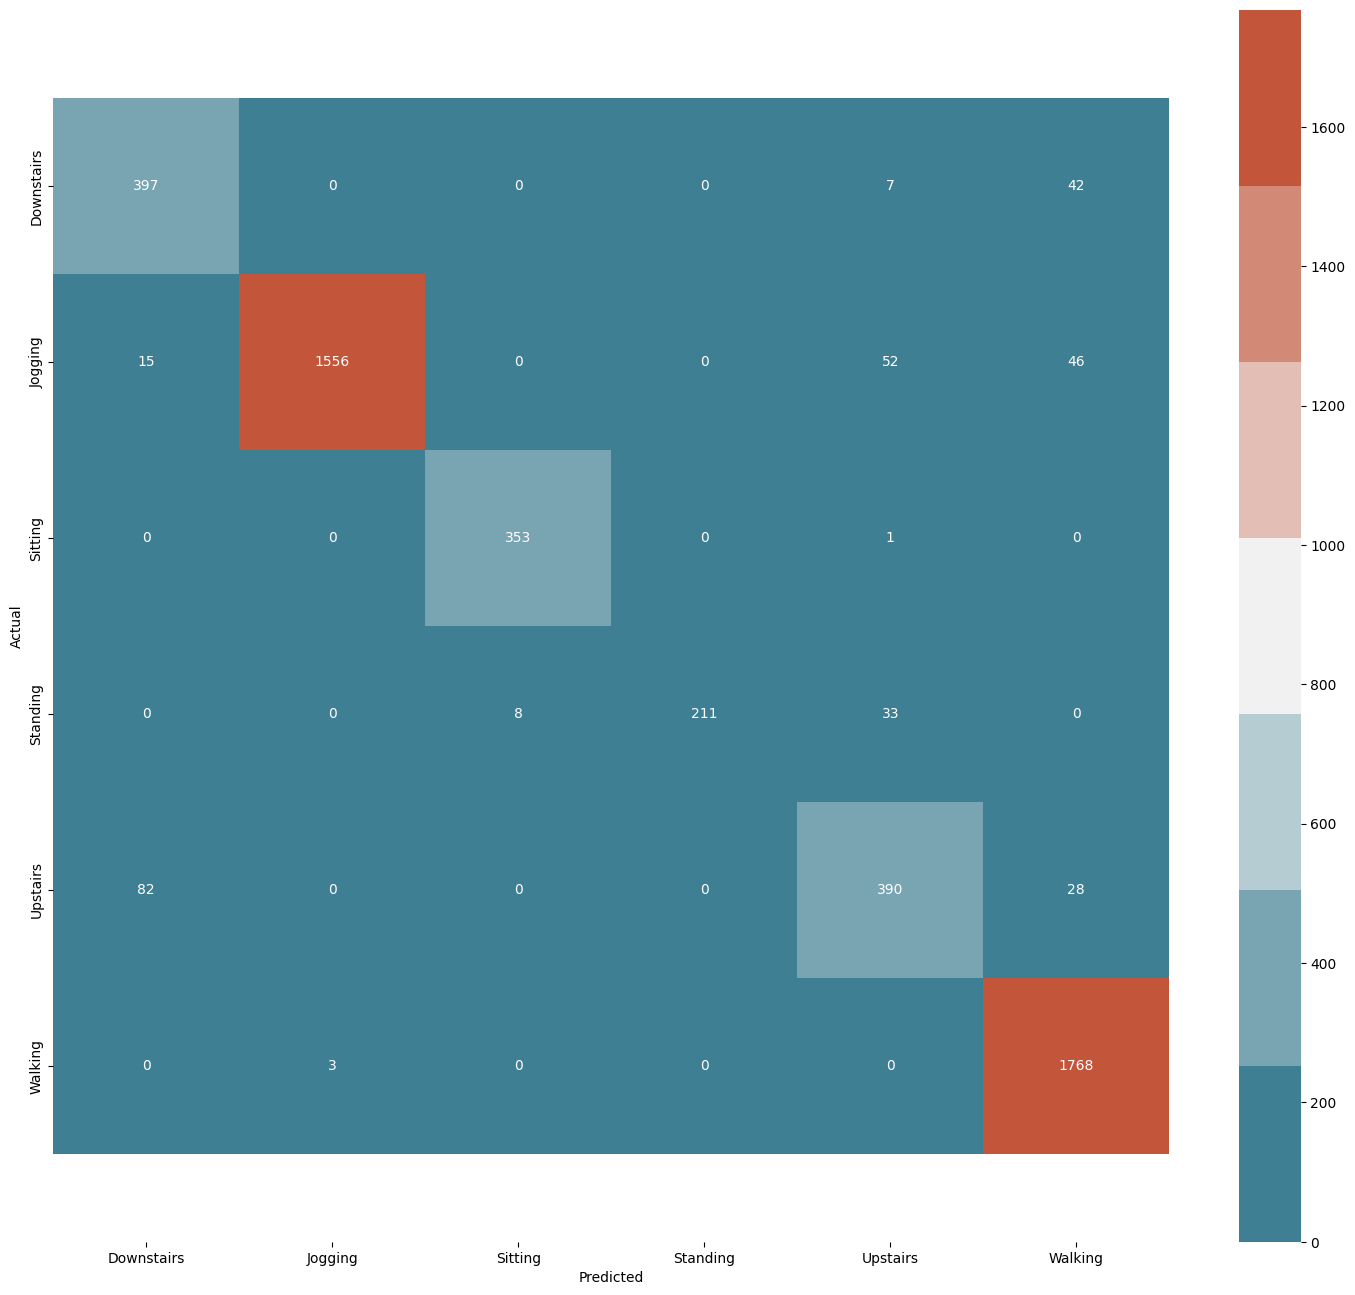

In [ ]:
from sklearn.metrics import confusion_matrix

def plot_cm(y_true, y_pred, class_names):
  cm = confusion_matrix(y_true, y_pred)
  fig, ax = plt.subplots(figsize=(18, 16))
  ax = sns.heatmap(cm, annot = True, fmt = "d", cmap = sns.diverging_palette(220, 20, n = 7), ax = ax)
  plt.ylabel("Actual")
  plt.xlabel("Predicted")
  ax.set_xticklabels(class_names)
  ax.set_yticklabels(class_names)
  b, t = plt.ylim()
  b += 0.5
  t -= 0.5
  plt.ylim(b, t)
  plt.show()

plot_cm(enc.inverse_transform(y_test), enc.inverse_transform(y_pred), enc.categories_[0])